# Introduction to deep learning

This notebook provides a soft introduction into the inner workings of deep learning. We will being with a brief over of machine learning 

## Types of machine learning

There are several types of machine learning as follows:

![machine_learning.png](../images/deep_learning/machine_learning.png)

The table below summarizes the main differences

| Feature             | Supervised Learning                                             | Unsupervised Learning                                   | Reinforcement Learning                                                  |
|---------------------|------------------------------------------------------------------|---------------------------------------------------------|-------------------------------------------------------------------------|
| Definition          | Learns a mapping from inputs to outputs using labeled data.      | Discovers patterns or structures from unlabeled data.   | Learns optimal actions through trial-and-error interactions with an environment.  |
| Data Type           | Labeled data (input-output pairs).                               | Unlabeled data (only inputs).                           | Observations, actions, rewards, and states of the environment.           |
| Objective           | Minimize error in predicting outcomes on new, unseen data.       | Identify inherent structures, clusters, or associations.| Maximize cumulative reward over time through effective decision-making.  |
| Common Examples     | Classification, regression tasks (e.g., spam detection, image recognition). | Clustering, dimensionality reduction (e.g., customer segmentation). | Game playing, robotics control, autonomous navigation.                |
| Learning Process    | Direct feedback provided via loss function against the labeled target. | No explicit feedback; learning from the data's underlying structure. | Learning through rewards and penalties, balancing exploration and exploitation. |

## What is deep learning

Deep learning is a subset of machine learning and can be used in all the previous types of machine learning (supervised, unsupervised, and reinforcement learning) that employs artificial neural networks to model and solve complex problems. 

It automatically extracts high-level features from raw data, making it especially powerful for tasks like image and speech recognition. Within the larger AI ecosystem, deep learning drives many state-of-the-art applications, enabling significant advancements in autonomous systems, natural language processing, and beyond.

![deep_learning_classification.png](../images/deep_learning/deep_learning_classification.png)

# The concept of a neural network

![node.png](../images/deep_learning/node.png)


A neural network node applies the following transformation to the inputs

$$
v = (w_1 \times x_1) + (w_2 \times x_2) + (w_3 \times x_3) + b
$$

The circle and arrow of the figure denote the node and signal flow, respectively. $x_1$, $x_2$, and $x_3$ are the input signals. $w_1$, $w_2$, and $w_3$ are the **weights** for the corresponding signals. Lastly, $b$ is the **bias**, which is another factor associated with the storage of information. In other words, the information of the neural net is stored in the form of weights and bias.

The equation above can be written as 

$ v = w\,x + b $

where $w$ and $x$ are defined as:

$$
w = [\,w_1 \quad w_2 \quad w_3\,]
\quad
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
$$

Finally, the node enters the weighted sum into the activation function and yields its output.  
The activation function determines the behavior of the node.

$ y = \phi(v) $

$\phi(.)$ is called the **activation function** 

Several of these activation functions and nodes can be combined to form a **deep neural network**

![node.png](../images/deep_learning/nn_layers.png)


## Training a neural network

We learn the weights and biases for each node by calculating an error metric over training data. We use the calculated error to adjust the weights and biases iteratively until no more improvement in the prediction error is possible 

![node.png](../images/deep_learning/nn_training.png)

### How to update the node weights and biases

Consider the following neural network example with one hidden layers and two nodes per layer

![node.png](../images/deep_learning/nn_example.png)

We update the weights

$$
w_{ij} \gets w_{ij} + \alpha\delta_i x_j
$$

where

$$
\delta_i = \phi'(v_i)e_i
$$

and 

* $e_i$ is the error of the output node $i$
* $v_i$ is the weighted sum of the output node $i$
* $\phi'$ is the *derivative* of the activation function $\phi$ of the output node $i$

and $i$ is the index of the node and $j$ is the index of the node in the previous layer.

### Calculating the derivatives

The following table summarizes the gradients for various activation functions

| Activation  | Definition                                         | Gradient                                              | Update                                             | Visual                                                  |
|-------------|----------------------------------------------------|-------------------------------------------------------|-----------------------------------------------------|---------------------------------------------------------|
| **Linear**  | $\phi(x) = x$                                      | $\phi'(x) = 1$                                        | $\displaystyle \delta_i = e_i$                      | ![linear.png](../images/deep_learning/linear.png)       |
| **Sigmoid** | $\displaystyle \phi(x) = \frac{1}{1 + e^{-x}}$     | $\displaystyle \phi'(x) = \phi(x)\,\bigl[1 - \phi(x)\bigr]$ | $\displaystyle \delta_i = \phi(v_i)\bigl[1 - \phi(v_i)\bigr]\;e_i$ | ![sigmoid.png](../images/deep_learning/sigmoid.png)     |
| **tanh**    | $\displaystyle \phi(x) = \tanh(x)$                 | $\displaystyle \phi'(x) = 1 - \tanh^2(x)$             | $\displaystyle \delta_i = \bigl[1 - \tanh^2(v_i)\bigr]\,e_i$       | ![tanh.png](../images/deep_learning/tanh.png)           |
| **ReLU**    | $\displaystyle \phi(x) = \max(0,\,x)$              | $\displaystyle \phi'(x) = \begin{cases} 1 & x > 0\\ 0 & x \le 0 \end{cases}$ | $\displaystyle \delta_i = \phi'(v_i)\,e_i = \begin{cases} e_i & v_i > 0\\ 0   & v_i \le 0 \end{cases}$ | ![ReLU.png](../images/deep_learning/ReLU.png)           |
| **Leaky ReLU** | $\displaystyle \phi(x) = \max(0.1x,\,x)$        | $\displaystyle \phi'(x) = \begin{cases} 1   & x > 0\\ 0.1 & x \le 0 \end{cases}$ | $\displaystyle \delta_i = \phi'(v_i)\,e_i  = \begin{cases} e_i        & v_i > 0\\ 0.1\,e_i   & v_i \le 0 \end{cases}$ | ![leaky_ReLU.png](../images/deep_learning/leaky_ReLU.png) |

The most common activation function is the **ReLU** because it simplifies backpropagation (because the gradient is easy to calculate)

Once we have $\delta_i$ we can easily update the weights using $w_{ij} \gets w_{ij} + \alpha\delta_i x_j$

**Below is a conceptual (and somewhat simplified) explanation of how the “delta” (i.e., the local gradient at the output neuron) is derived under Mean Squared Error (MSE) assuming a sigmoid activation function at the output.**

### Mean Squared Error (MSE)

#### Cost (for one training example)

$$
\text{MSE} = \tfrac12 \bigl(d - y\bigr)^2,
$$

where  
- $d$ is the target (desired) output (e.g., $0$ or $1$ in a classification setting),  
- $y$ is the actual network output after the sigmoid.

#### Derivative wrt the output $y$

$$
\frac{\partial \text{MSE}}{\partial y}
=
\frac{1}{2} \cdot 2 \,(y - d)
=
y - d.
$$

Sometimes you will see $(d - y)$ used as the error term; this is just a sign convention. In practice, people often define $ e = d - y $ and then keep track of the sign in the weight update. Both forms are correct as long as you’re consistent.

#### Sigmoid derivative wrt the neuron’s input $v$

$$
\frac{d\,\sigma(v)}{dv} 
= 
y\,(1 - y),
$$

because $ y = \sigma(v) = \frac{1}{1 + e^{-v}}. $

#### Putting it all together

By the chain rule, the local gradient at the output node wrt the net input $v$ is:

$$
\delta_{\text{MSE}}
=
\frac{\partial \text{MSE}}{\partial v}
=
\underbrace{\frac{\partial \text{MSE}}{\partial y}}_{\;y - d\;}
\times
\underbrace{\frac{\partial y}{\partial v}}_{\;y(1 - y)\;}
=
(y - d)\,y\,(1 - y).
$$

If your code defines $ e = d - y $, you often see

$$
\delta_{\text{MSE}}
= 
y\,(1 - y)\,(d - y).
$$

Both forms are equivalent up to a sign convention in the weight update.

### Stochastic gradient descent

Stochastic Gradient Descent (SGD) is the mechanism by which the updates to the weights and biases happen. We looked at the simplest case where the error from a single training point is used to do the update $w_{ij} \gets w_{ij} + \alpha\delta_i x_j$ which can be written as $w_{ij} \gets w_{ij} + \Delta w_{ij}$

$$
\Delta w_{ij} = \alpha\delta_i x_j
$$


| Method                                | Description                                                                                                                                                                                                                                                                     | Weight Update Equation                                      | Figure                                                       |
|---------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|--------------------------------------------------------------|
| Stochastic Gradient Descent (SGD)     | Calculates the error for each training data point and adjusts the weights immediately. For example, if there are 100 data points, the weights are updated 100 times.                                                                                                        | $\Delta w_{ij} = \alpha\delta_i x_j$                                            | ![SGD.png](../images/deep_learning/SGD.png)                   |
| Batch Method                          | Computes the weight update for all training data errors and uses their average, updating the weights only once per epoch.                                                                                                                                                         | $\Delta w_{ij} = \dfrac{1}{N}\sum_{k=1}^{N}\Delta w_{ij}(k)$                       | ![batch.png](../images/deep_learning/batch.png)               |
| Mini-Batch Method                     | Combines SGD and Batch: it selects a subset of the training data (e.g., 20 out of 100 data points) and applies the batch method to this subset, resulting in multiple updates per epoch (in this example, 5 updates).                                                   | $\Delta w_{ij} = \dfrac{1}{N_\text{batch}}\sum_{k=1}^{N_\text{batch}}\Delta w_{ij}(k)$         | ![mini_batch.png](../images/deep_learning/mini_batch.png)      |


The minibatch method, when it selects an appropriate number of data points, obtains the benefits from both methods: speed from the SGD and stability from the batch. For this reason, it is often utilized in Deep Learning, which manipulates a significant amount of data.


# Training of Multi-Layer Neural Network using backpropagation

The use of SGD (with or without mini-batching) is referred to practically as the **backpropagation algorithm**. This is because the input data of the neural network travels through the input layer, hidden layer, and output layer (left to right). In contrast, in the back-propagation algorithm, the output error starts from the output layer and moves backward until it reaches the right next hidden layer to the input layer (right to left). This process is called back-propagation, as it resembles an output error propagating backward. Even in back-propagation, the signal still flows through the connecting lines and the weights are multiplied. The only difference is that the input and output signals flow in opposite directions.

![backpropagation.png](../images/deep_learning/backpropagation.png)

Let us revisit the previous example with one hidden layer and two nodes per layer

![nn_example.png](../images/deep_learning/nn_example.png)

In order to obtain the output error, we first need the neural network’s output from the input data. As this network has a single hidden layer, we need two input data manipulations before the output calculation is processed. First, the weighted sum of the hidden nodes is calculated as

$$
\begin{bmatrix}
v_{1}^{(1)} \\
v_{2}^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)}
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}
\quad \triangleq \quad W_{1}\,x
$$

When we put this weighted sum(Equation above), into the activation function,we obtain the output from the hidden nodes


$$
\begin{bmatrix}
y_{1}^{(1)} \\
y_{2}^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
\phi\!\bigl(v_{1}^{(1)}\bigr) \\
\phi\!\bigl(v_{2}^{(1)}\bigr)
\end{bmatrix}
$$

where $y_{1}^{(1)}$ and $y_{2}^{(1)}$ are outputs from the corresponding hidden nodes. In a similar manner, the weighted sum of the output nodes is calculated as:

$$
\begin{bmatrix}
v_{1} \\
v_{2}
\end{bmatrix}
=
\begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)}
\end{bmatrix}
\begin{bmatrix}
y_{1}^{(1)} \\
y_{2}^{(1)}
\end{bmatrix}
\quad \triangleq \quad
W_{2}\,y^{(1)}.
$$

As we put this weighted sum into the activation function, the neural networkyields the output.

$$
\begin{bmatrix}
y_{1} \\
y_{2}
\end{bmatrix}
=
\begin{bmatrix}
\phi\!\bigl(v_{1}\bigr) \\
\phi\!\bigl(v_{2}\bigr)
\end{bmatrix}
$$

#### Training using backpropagation

**Output layer**

To train the neural network using the back-propagation algorithm, we can use the Generalized Delta Rule

![nn_example_error_1.png](../images/deep_learning/nn_example_error_1.png)

$$
\begin{aligned}
e_{1} &= d_{1} - y_{1}, \\
\delta_{1} &= \phi'\!\bigl(v_{1}\bigr)\,e_{1}, \\[6pt]
e_{2} &= d_{2} - y_{2}, \\
\delta_{2} &= \phi'\!\bigl(v_{2}\bigr)\,e_{2}.
\end{aligned}
$$

**Hidden layer**

Next, we proceed to the hidden layer

![nn_example_error_2.png](../images/deep_learning/nn_example_error_2.png)

$$
\begin{aligned}
e_{1}^{(1)} &= w_{11}^{(2)}\,\delta_{1} \;+\; w_{21}^{(2)}\,\delta_{2}, \\
\delta_{1}^{(1)} &= \phi'\!\bigl(v_{1}^{(1)}\bigr)\,e_{1}^{(1)}, \\[6pt]
e_{2}^{(1)} &= w_{12}^{(2)}\,\delta_{1} \;+\; w_{22}^{(2)}\,\delta_{2}, \\
\delta_{2}^{(1)} &= \phi'\!\bigl(v_{2}^{(1)}\bigr)\,e_{2}^{(1)}.
\end{aligned}
$$

where are $v_{1}^{(1)}$ and $v_{2}^{(1)}$ the weight sums of the forward signals at the respective nodes. It is noticeable from this equation that the forward and backward processes are identically applied to the hidden nodes as well as the output nodes. This implies that the output and hidden nodes experience the same backward process. The only difference is the error calculation

![error_calc.png](../images/deep_learning/error_calc.png)

In summary, the error of the hidden node is calculated as the backward weighted sum of the delta, and the delta of the node is the product of the error and the derivative of the activation function. This process begins at the output layer and repeats for all hidden layers. This pretty much explains what the back-propagation algorithm is about.

The two error calculation formulas are combined in a matrix equation as follows


$$
\begin{bmatrix}
e_{1}^{(1)}\\[6pt]
e_{2}^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
w_{11}^{(2)} & w_{21}^{(2)}\\[6pt]
w_{12}^{(2)} & w_{22}^{(2)}
\end{bmatrix}
\begin{bmatrix}
\delta_{1}\\[6pt]
\delta_{2}
\end{bmatrix}
\quad\triangleq\quad
W_{2}^{\mathsf{T}}
\begin{bmatrix}
\delta_{1}\\[4pt]
\delta_{2}
\end{bmatrix}.
$$

If we have additional hidden layers, we will just repeat the same backward process for each hidden layer and calculate all the deltas. Once all the deltas have been calculated, we will be ready to train the neural network. Just use the following equation to adjust the weights of the respective layers

$$
\Delta w_{ij} = \alpha\,\delta_i\,x_j
\quad\text{and}\quad
w_{ij} \;\gets\; w_{ij} + \Delta w_{ij}.
$$


## Deep learning examples:

We will illustrate a supervised learning for both regression and classification

### Example: XOR logic operations

Let us try to train a simple neural network to predict the output of an XOR logical operation

| $x_1$ | $x_2$ | $x_3$ | $y_1$ |
|----|----|----|----|
| 0  | 0  | 1  | **0**  |
| 0  | 1  | 1  | **1**  |
| 1  | 0  | 1  | **1**  |
| 1  | 1  | 1  | **0**  |

We will use a network with a single hidden layer, 3 input nodes, 4 hidden nodes, and 1 output node

![xor_net.png](../images/deep_learning/xor_net.png)

We will implement the backpropagation algorithm for this example

In [48]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def BackpropXOR(W1, W2, X, D):
    alpha = 0.9
    N = X.shape[0]  # number of samples
    
    loss = 0.0

    for k in range(N):
        # Convert row from X into a column vector
        x = X[k, :].reshape(-1, 1)
        d = D[k]
        
        # Forward pass
        v1 = W1 @ x
        y1 = sigmoid(v1)
        v = W2 @ y1
        y = sigmoid(v)
        
        # Error at output
        e = d - y
        loss += (e.T @ e).ravel()[0]
        # Backprop for output layer
        delta = y * (1 - y) * e
        
        # Error at hidden layer
        e1 = W2.T @ delta
        # Backprop for hidden layer
        delta1 = y1 * (1 - y1) * e1
        
        # Weight updates
        dW1 = alpha * (delta1 @ x.T)
        W1 += dW1
        
        dW2 = alpha * (delta @ y1.T)
        W2 += dW2
    
    return W1, W2, loss / N

Now we can begin by training the model iteratively using the backpropagation algorithm as follows. We will repeat the calculation for 10000 steps (which are called epochs in deep learning)

Input = [0. 0. 1.] => Output = 0.0085
Input = [0. 1. 1.] => Output = 0.9882
Input = [1. 0. 1.] => Output = 0.9880
Input = [1. 1. 1.] => Output = 0.0171


Text(0, 0.5, 'Error')

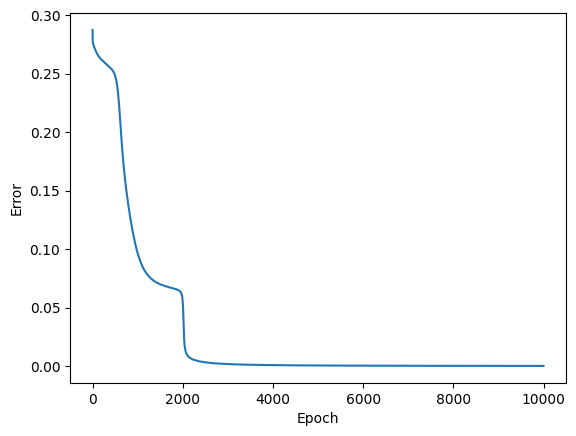

In [49]:
# Data (XOR problem with a bias input = 1)
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
], dtype=float)

# Desired outputs
D = np.array([0, 1, 1, 0], dtype=float)

# Weight initialization (same scheme as MATLAB)
np.random.seed(0)  # for reproducibility, optional
W1 = 2.0 * np.random.rand(4, 3) - 1.0  # (4 neurons, 3 inputs)
W2 = 2.0 * np.random.rand(1, 4) - 1.0  # (1 output neuron, 4 hidden neurons)

# Training
errors_mse = []

for epoch in range(10000):
    W1, W2, error = BackpropXOR(W1, W2, X, D)
    errors_mse.append(error)

# Inference on all samples
N = X.shape[0]
for k in range(N):
    x = X[k, :].reshape(-1, 1)
    v1 = W1 @ x
    y1 = sigmoid(v1)
    v = W2 @ y1
    y = sigmoid(v)
    print(f"Input = {X[k, :]} => Output = {y.ravel()[0]:.4f}")

# Plot the error
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(errors_mse)
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")

Now we reimplement the same backpropagation algorithm with Cross-Entropy (CE) loss defined as

### Cross Entropy (CE)

#### Cost (for one training example)

When dealing with a sigmoid output neuron, a common choice is **binary cross‐entropy**:

$$
\text{CE} 
= 
- \Bigl[\,
d\,\ln(y) 
\;+\; 
(1 - d)\,\ln\bigl(1 - y\bigr)
\Bigr].
$$

#### Derivative wrt the output $y$

$$
\frac{\partial \text{CE}}{\partial y}
=
-
\Bigl[\,
d\,\frac{1}{y}
\;-\; 
(1 - d)\,\frac{1}{1 - y}
\Bigr]
=
\frac{y - d}{y\,(1 - y)}.
$$

#### Multiply by sigmoid derivative wrt $v$

Recall the derivative of the sigmoid is $y\,(1 - y)$. Thus, by the chain rule:

$$
\frac{\partial \text{CE}}{\partial v}
=
\underbrace{\frac{y - d}{y\,(1 - y)}}_{\partial CE / \partial y}
\times
\underbrace{y\,(1 - y)}_{\partial y / \partial v}
=
y - d.
$$

Hence the **local gradient** (often called $\delta$ or “delta”) for a sigmoid output under cross‐entropy is simply:

$$
\delta_{\text{CE}} = y - d.
$$

---

### Summary of the Two “Deltas”

| **Cost**                | **Delta ($\delta$) at Sigmoid Output**                    |
|-------------------------|-------------------------------------------------------------|
| **MSE**                 | $\,(y - d)\,y\,(1 - y)$ or $(d - y)\,y\,(1 - y)^\ast$ |
| **Cross Entropy (CE)** | $\,y - d$                                                 |

$\ast$ The sign $(y-d)$ vs. $(d-y)$ depends on how you define “error,” but the chain rule outcome is essentially the same once you incorporate it into the weight update.

---

### Practical Takeaways

1. **Cross Entropy** with a sigmoid output **simplifies the derivative**. You don’t multiply by $ y(1-y) $ to get the final delta at the output neuron; the derivative effectively “cancels” it out.  
2. **Cross Entropy** is usually recommended for classification tasks with sigmoid or softmax outputs, as it tends to speed up and stabilize learning compared to MSE.  
3. **MSE** can still work, but it sometimes leads to slower convergence in classification problems because of the extra $y(1 - y)$ term.

### Here is a code example for the XOR neural network implementing CE loss

Input [0. 0. 1.] => Output = 0.0001
Input [0. 1. 1.] => Output = 0.9999
Input [1. 0. 1.] => Output = 0.9999
Input [1. 1. 1.] => Output = 0.0002


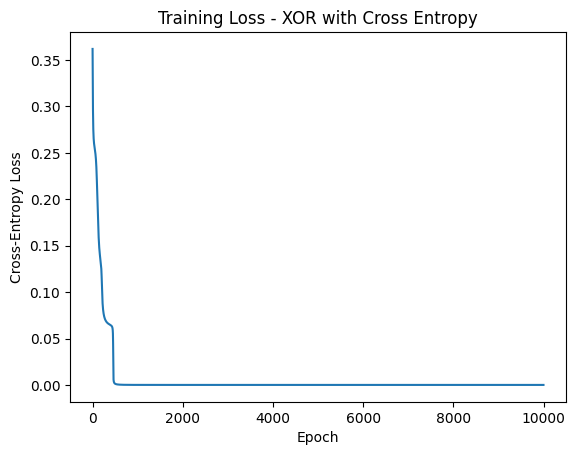

In [50]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def BackpropXOR_CE(W1, W2, X, D):
    """
    Single-epoch cross-entropy backprop for XOR.
    W1, W2: weight matrices
    X: input data (N x nFeatures)
    D: target outputs (length N or shape (N,))
    """
    alpha = 0.9
    N = X.shape[0]
    total_loss = 0.0
    
    for k in range(N):
        # Forward pass
        x = X[k, :].reshape(-1, 1)  # Column vector
        d = D[k]

        # Hidden layer
        v1 = W1 @ x
        y1 = sigmoid(v1)

        # Output layer
        v2 = W2 @ y1
        y2 = sigmoid(v2)   # final output

        # ---- MSE loss for comparison ----
        total_loss += ((d - y2).T @ (d - y2)).ravel()[0]

        # ---- Backprop with cross-entropy ----
        # Output delta for cross-entropy + sigmoid is (y - d)
        delta2 = d - y2

        # Hidden layer error
        e1 = W2.T @ delta2
        # Hidden layer delta still uses derivative of sigmoid
        delta1 = y1 * (1.0 - y1) * e1

        # Weight updates
        W2 += alpha * (delta2 @ y1.T)   # shape: (1 x 4) + (1 x 4)
        W1 += alpha * (delta1 @ x.T)    # shape: (4 x 3) + (4 x 3)

    # Return average cross-entropy over all samples this epoch
    avg_loss = total_loss / N
    return W1, W2, avg_loss

# ---------------------------------------------------------------
# Example usage with the XOR dataset:

# Data (XOR problem with bias input = 1 in last column)
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
], dtype=float)

# Desired outputs
D = np.array([0, 1, 1, 0], dtype=float)

# Weight initialization
np.random.seed(0)
W1 = 2 * np.random.rand(4, 3) - 1.0  # 4 hidden neurons, 3 inputs
W2 = 2 * np.random.rand(1, 4) - 1.0  # 1 output neuron, 4 hidden neurons

# Train for multiple epochs
n_epochs = 10000
loss_CE = []

for epoch in range(n_epochs):
    W1, W2, loss = BackpropXOR_CE(W1, W2, X, D)
    loss_CE.append(loss.item())  # store scalar

# After training, test each input sample
for k in range(X.shape[0]):
    x = X[k, :].reshape(-1, 1)
    v1 = W1 @ x
    y1 = sigmoid(v1)
    v2 = W2 @ y1
    y2 = sigmoid(v2)
    print(f"Input {X[k, :]} => Output = {y2.item():.4f}")

# Plot the loss over epochs
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(loss_CE)
ax.set_xlabel("Epoch")
ax.set_ylabel("Cross-Entropy Loss")
ax.set_title("Training Loss - XOR with Cross Entropy")
plt.show()

Now let us compare the Cross entropy loss with the Mean-squared loss

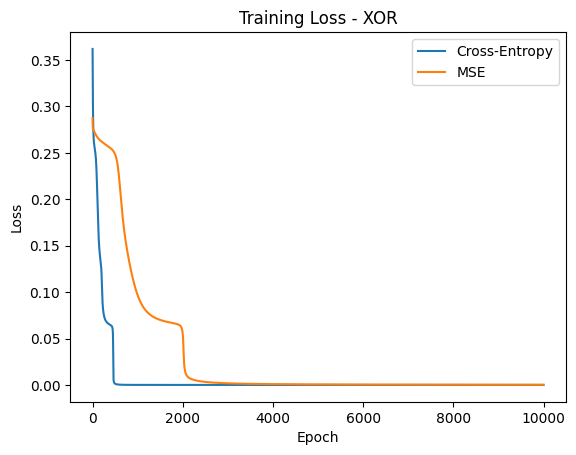

In [51]:
fig, ax = plt.subplots()

ax.plot(loss_CE, label="Cross-Entropy")
ax.plot(errors_mse, label="MSE")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training Loss - XOR")
ax.legend()
plt.show()

This shows that cross-entropy loss is more suited for classification problems such as the XOR logic

# Neural Networks and Multi-Class Classification

Consider a classification of the given inputs of coordinates (x,y) into one of three classes

![class_example.png](../images/deep_learning/class_example.png)

We can configure a neural network to classify the data into one of these classes

![class_example.png](../images/deep_learning/class_nn.png)

**The Softmax Function**

The **softmax** function is used in **multi‐class classification** to turn raw “logits” (the weighted sums going into each output node) into a valid set of **probabilities** across multiple classes. In other words, it ensures that:

1. **Each output** lies between 0 and 1.  
2. **All outputs** for a given sample sum to 1.

Mathematically, suppose you have three logits $z_1, z_2, z_3$, which might be $\{2, 1, 0.1\}$. The softmax function computes:

$$
\text{softmax}(z_i)
=
\frac{e^{\,z_i}}
{\displaystyle \sum_{j} e^{\,z_j}}.
$$

- First, it **exponentiates** each logit, turning negative or positive values into strictly positive numbers.
- Then it **normalizes** by dividing by the sum of all exponentiated logits, so that the three outputs form a probability distribution.

As an exmaple:

$$
v 
= 
\begin{bmatrix}
2\\[6pt]
1\\[6pt]
0.1
\end{bmatrix}
\quad\Longrightarrow\quad
\phi(v)
=
\begin{bmatrix}
\dfrac{e^{2}}{\,e^{2} \;+\; e^{1} \;+\; e^{0.1}\,} \\[12pt]
\dfrac{e^{1}}{\,e^{2} \;+\; e^{1} \;+\; e^{0.1}\,} \\[12pt]
\dfrac{e^{0.1}}{\,e^{2} \;+\; e^{1} \;+\; e^{0.1}\,}
\end{bmatrix}
=
\begin{bmatrix}
0.6590\\[6pt]
0.2424\\[6pt]
0.0986
\end{bmatrix}.
$$


Unlike a simple sigmoid—which handles only the weighted sum for a single output—**softmax “looks” at all outputs simultaneously** and allocates probability mass among them. That’s why it is preferred in multi‐class problems where exactly one class is correct and we want the outputs to sum to 1.


## Multiclass classification example

Consider five-by-five pixel squares that display five numbers from 1 to 5

![pixel_example.png](../images/deep_learning/pixel_example.png)

The neural network model contains asingle hidden layer (shallow net), as shownin the Figurebelow. As each image is set on a matrix, we set 25 input nodes. In addition, as we have five digits to classify, the network contains five output nodes. The **softmax** function is used as the activation function of the output node. The hidden layer has 50 nodes and the sigmoid function is used as the activation function.

![pixel_example.png](../images/deep_learning/multiclass_nn.png)


In [58]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def softmax(z):
    """
    Numerically stable softmax for column vector z.
    Returns a column vector whose entries sum to 1.
    """
    # Shift by max(z) for numerical stability:
    z_shifted = z - np.max(z)
    exps = np.exp(z_shifted)
    return exps / np.sum(exps, axis=0, keepdims=True)

def MultiClass(W1, W2, X, D):
    alpha = 0.01
    N = X.shape[2]  # Number of training samples
    total_loss = 0.0
    for k in range(N):
        # Reshape the k-th 5×5 image into a 25×1 column vector
        x = X[:, :, k].reshape(25, 1)
        
        # Target is a one-hot column vector, e.g. shape (numClasses, 1)
        d = D[k, :].reshape(-1, 1)
        
        # Forward pass
        v1 = W1 @ x
        y1 = sigmoid(v1)
        v2 = W2 @ y1
        y2 = softmax(v2)   # multi-class output
        
        # Error at output
        e = d - y2
        total_loss += -np.sum(d * np.log(y2))  # cross-entropy loss
        # For softmax + cross-entropy, delta is simply e if you are using (d - y)
        delta2 = e
        
        # Backprop to hidden
        e1 = W2.T @ delta2
        delta1 = y1 * (1 - y1) * e1  # derivative of sigmoid
        
        # Weight updates
        W1 += alpha * (delta1 @ x.T)
        W2 += alpha * (delta2 @ y1.T)

    return W1, W2, total_loss / N

```python
W1, W2, loss = MultiClass(W1, W2, X, D)
```
Where `W1` and `W2` are the weight matrices ofthe input-hidden and hidden-output layers, respectively. `X` and `D` are the input and correct output of the training data, respectively.

Now we train the neural network using the data we have

![pixel_example.png](../images/deep_learning/pixel_example.png)

Sample 1 => Output =
[9.98705010e-01 3.77606953e-04 4.01306159e-04 3.54629931e-04
 1.61446630e-04]

Sample 2 => Output =
[4.65061414e-04 9.98017577e-01 1.34693672e-03 4.28717026e-05
 1.27552715e-04]

Sample 3 => Output =
[3.07384469e-04 1.29024006e-03 9.96820289e-01 4.02619241e-04
 1.17946730e-03]

Sample 4 => Output =
[4.22643055e-04 5.75012826e-05 3.65238093e-04 9.98917945e-01
 2.36673000e-04]

Sample 5 => Output =
[1.58678750e-04 2.21722059e-04 1.13141583e-03 1.51612031e-04
 9.98336571e-01]



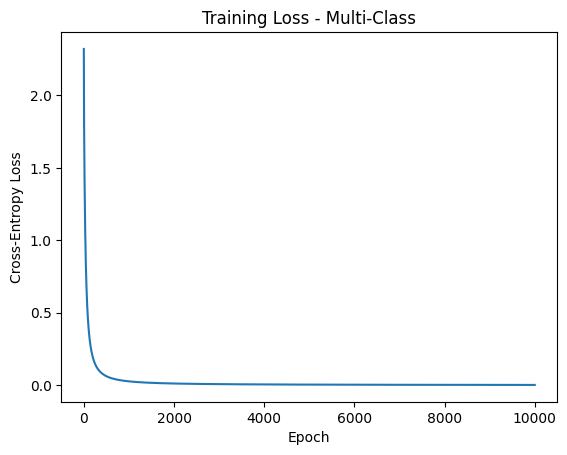

In [59]:

# 1) Initialize X as (5,5,5) array
X = np.zeros((5, 5, 5), dtype=float)

X[:, :, 0] = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0]
], dtype=float)

X[:, :, 1] = np.array([
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1]
], dtype=float)

X[:, :, 2] = np.array([
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0]
], dtype=float)

X[:, :, 3] = np.array([
    [0, 0, 0, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 1, 0]
], dtype=float)

X[:, :, 4] = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0]
], dtype=float)

# 2) Desired one-hot outputs (5 classes)
D = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
], dtype=float)

# 3) Weight initialization
np.random.seed(3)
W1 = 2 * np.random.rand(50, 25) - 1  # first layer (50 neurons, 25 inputs)
W2 = 2 * np.random.rand(5, 50) - 1   # second layer (5 classes, 50 hidden units)

# ------------------------------------------------------------------
# Train for multiple epochs (equivalent to the for epoch = 1:10000 in MATLAB)
n_epochs = 10000
multiclass_loss = []
for epoch in range(n_epochs):
    W1, W2, loss = MultiClass(W1, W2, X, D)
    multiclass_loss.append(loss)

# ------------------------------------------------------------------
# Inference on the 5 samples
N = 5
for k in range(N):
    # Flatten the k-th 5×5 image
    x = X[:, :, k].reshape(25, 1)
    # Forward pass
    v1 = W1 @ x
    y1 = sigmoid(v1)
    v2 = W2 @ y1
    y2 = softmax(v2)
    print(f"Sample {k+1} => Output =\n{y2.ravel()}\n")

fig, ax = plt.subplots()
ax.plot(multiclass_loss)
ax.set_xlabel("Epoch")
ax.set_ylabel("Cross-Entropy Loss")
ax.set_title("Training Loss - Multi-Class")
plt.show()

We can see that the neural network has correctly labelled each of the five matrices (the value with the highest probability) for example:

```bash
Sample 1 => Output =
[**9.99990560e-01**, 3.73975045e-06 7.29323123e-07 4.95516529e-06
 1.56459758e-08]
 ```

 shows that the first class has the highest probability of **9.99990560e-01**

Now let us use the network to perform inference on some corrupted data

![pixel_example_corrupted.png](../images/deep_learning/pixel_example_corrupted.png)

In [60]:
X[:, :, 0] = np.array([
    [0, 0, 1, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0]
], dtype=float)

X[:, :, 1] = np.array([
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
], dtype=float)

X[:, :, 2] = np.array([
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 0]
], dtype=float)

X[:, :, 3] = np.array([
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0]
], dtype=float)

X[:, :, 4] = np.array([
    [0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0]
], dtype=float)

N = 5
for k in range(N):
    # Flatten the k-th 5×5 image
    x = X[:, :, k].reshape(25, 1)
    
    # Forward pass
    v1 = W1 @ x
    y1 = sigmoid(v1)
    v2 = W2 @ y1
    y2 = softmax(v2)
    
    # Print output probabilities for each sample
    print(f"Sample {k+1} => Output Probabilities: {y2.ravel()}")

Sample 1 => Output Probabilities: [0.60412079 0.02597032 0.11502116 0.23744718 0.01744056]
Sample 2 => Output Probabilities: [0.00286269 0.81234855 0.18181019 0.00121346 0.00176512]
Sample 3 => Output Probabilities: [0.00254375 0.10093193 0.88994151 0.0036714  0.0029114 ]
Sample 4 => Output Probabilities: [0.38693994 0.27145581 0.23548507 0.05559159 0.05052758]
Sample 5 => Output Probabilities: [0.13185629 0.19565041 0.08528385 0.0070388  0.58017064]


we can see that

-----------------------
```
Sample 1 => Output Probabilities: [0.60412079 0.02597032 0.11502116 0.23744718 0.01744056]
```

corresponds to "1"

-----------------------
```
Sample 2 => Output Probabilities: [0.00286269 0.81234855 0.18181019 0.00121346 0.00176512]
```

corresponds to "2"

-----------------------
```
Sample 3 => Output Probabilities: [0.00254375 0.10093193 0.88994151 0.0036714  0.0029114 ]
```

corresponds to "3"

-----------------------
```
Sample 4 => Output Probabilities: [0.38693994 0.27145581 0.23548507 0.05559159 0.05052758]
```

corresponds to "1"

-----------------------
```
Sample 5 => Output Probabilities: [0.13185629 0.19565041 0.08528385 0.0070388  0.58017064]
```

corresponds to "5"
